In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from IPython.core.display import display, HTML

mpl.style.use(['ggplot'])

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/README.md
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/6345.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/9812.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/2339.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5404.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5150.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/1624.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/3188.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/7964.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learni

In [2]:
districts_info = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv")
districts_info

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
229,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000["
230,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
231,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN


In [3]:
districts_info.describe(include='all')

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
count,233.000000,176,176,176,148,162,118
unique,NaN,23,4,5,5,2,11
top,NaN,Connecticut,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["
freq,NaN,30,104,116,48,161,30
mean,5219.776824,NaN,NaN,NaN,NaN,NaN,NaN
std,2595.751581,NaN,NaN,NaN,NaN,NaN,NaN
min,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2991.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,4937.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,7660.000000,NaN,NaN,NaN,NaN,NaN,NaN


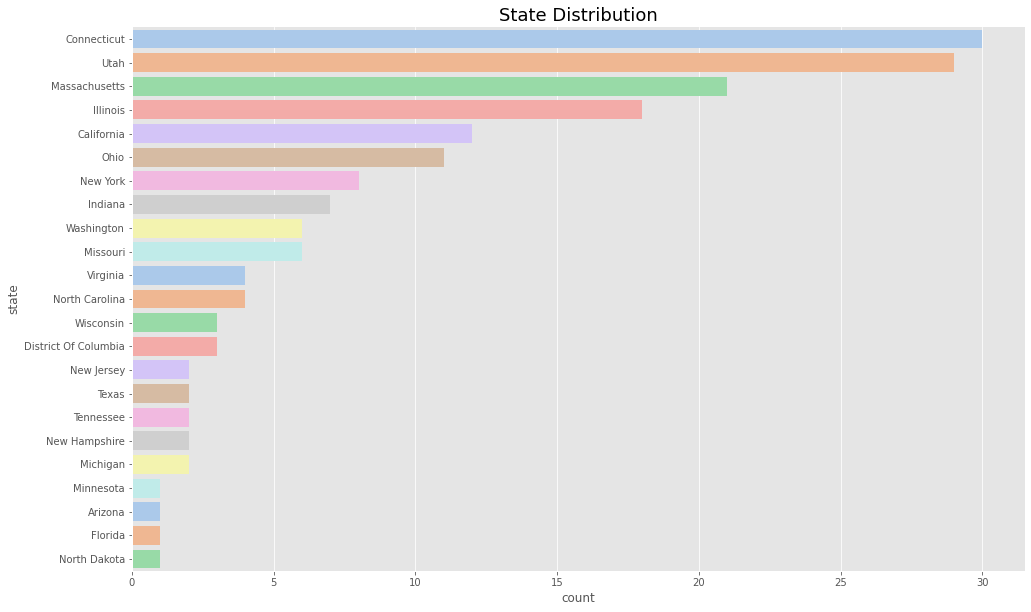

In [4]:
plt.figure(figsize=(16, 10))

sns.countplot(y="state",data=districts_info,order=districts_info.state.value_counts().index,palette="pastel",linewidth=3)
plt.title("State Distribution",size=18)

sns.despine()
plt.show()

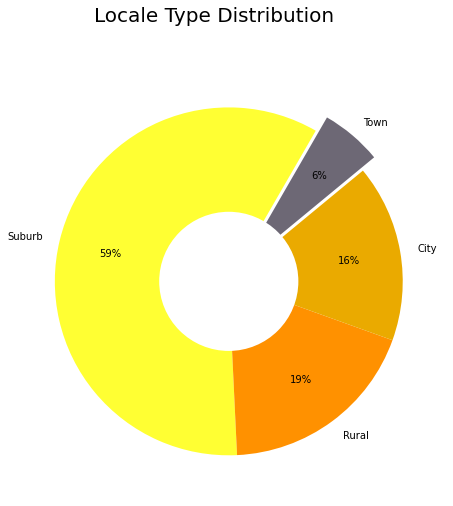

In [5]:
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Locale Type Distribution', size = 20)

labels = list(districts_info.locale.value_counts().index)
sizes = districts_info.locale.value_counts().values
explode = (0, 0, 0, 0.1)

ax.pie(sizes, explode=explode,startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.7, colors=["#FFFF33","#ff9100","#eaaa00","#6d6875"])
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

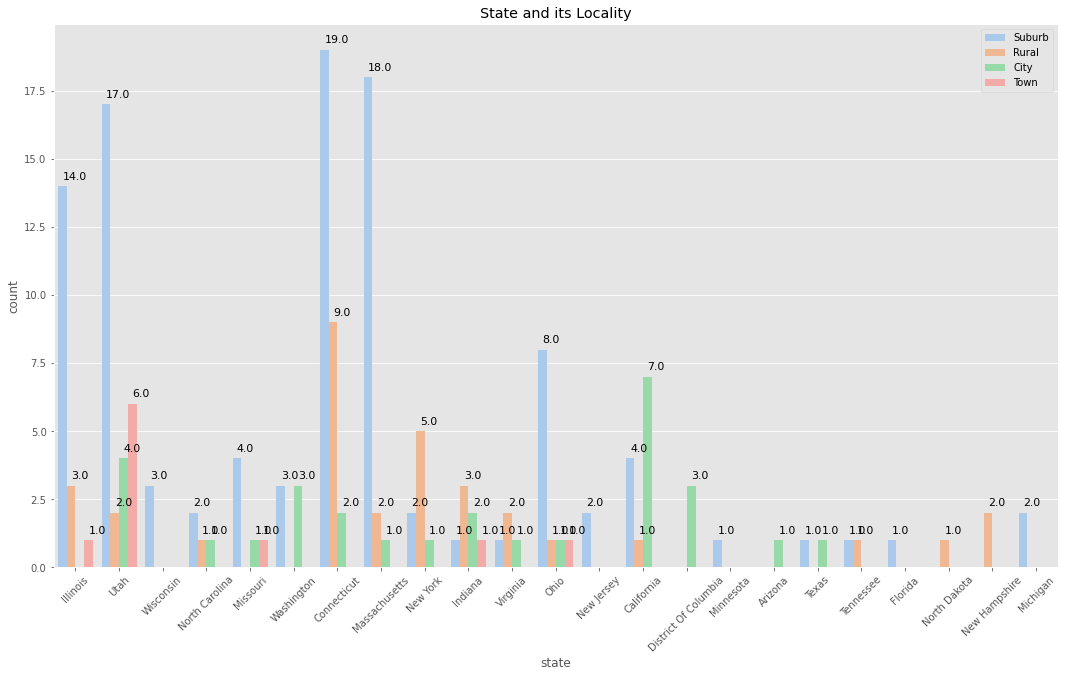

In [6]:
plt.figure(figsize=(18,10))

ax=sns.countplot(data=districts_info,x='state',palette='pastel', hue='locale')

plt.xticks(rotation=45)
plt.title("State and its Locality")
plt.legend(loc='upper right')
for p in ax.patches:
    ax.text (p.get_x() + p.get_width()  / 2,p.get_height()+ 0.25,p.get_height(), fontsize = 11)

In [7]:
products_info = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/products_info.csv")
products_info

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
...,...,...,...,...,...,...
367,88065,https://dochub.com/,DocHub,DocHub,PreK-12; Higher Ed; Corporate,SDO - Other
368,37805,http://google.com/slides/about/,Google Slides,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation
369,32555,http://www.innersloth.com/gameAmongUs.php,Among Us,InnerSloth,PreK-12; Higher Ed,"LC - Sites, Resources & Reference - Games & Si..."
370,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,NaN,NaN


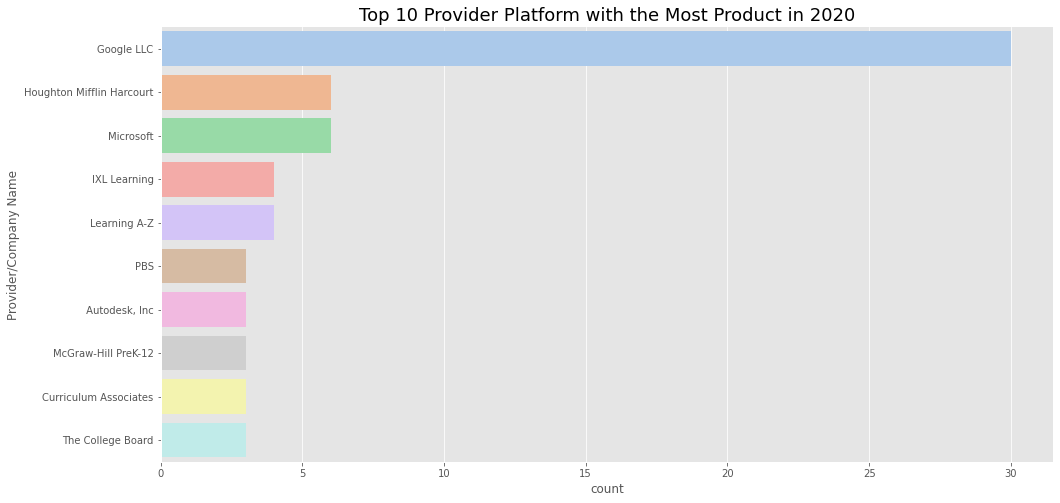

In [8]:
plt.figure(figsize = (16,8))

sns.countplot(data=products_info, y="Provider/Company Name", order=products_info['Provider/Company Name'].value_counts().index[:10], palette='pastel')
plt.title('Top 10 Provider Platform with the Most Product in 2020', size=18)
sns.despine()
plt.show()

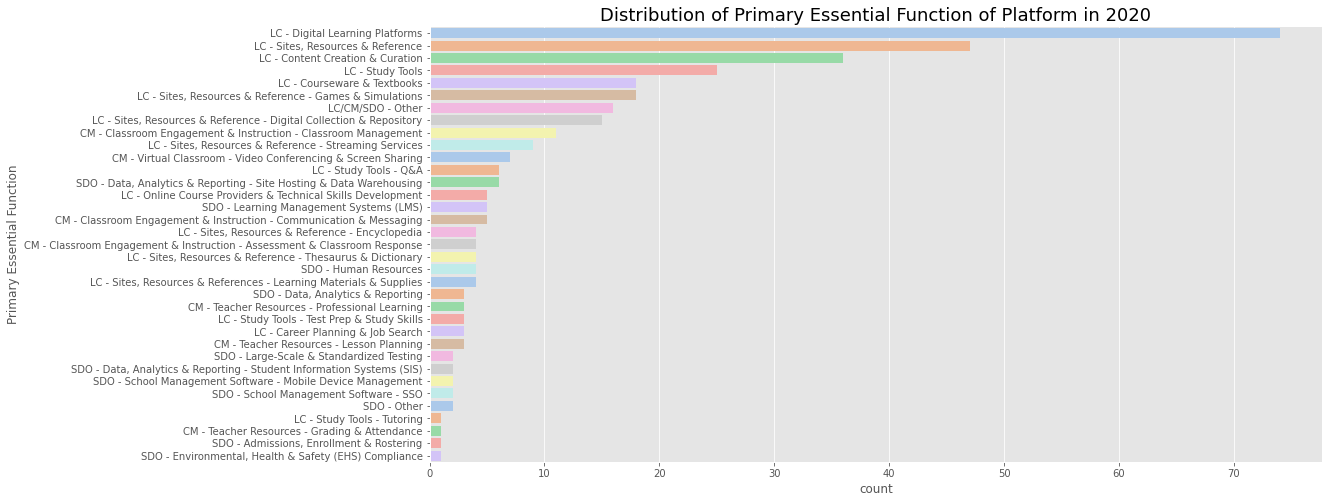

In [9]:
plt.figure(figsize = (16,8))

sns.countplot(data=products_info, y="Primary Essential Function", order=products_info['Primary Essential Function'].value_counts().index[:], palette='pastel')
plt.title('Distribution of Primary Essential Function of Platform in 2020', size=18)
sns.despine()
plt.show()

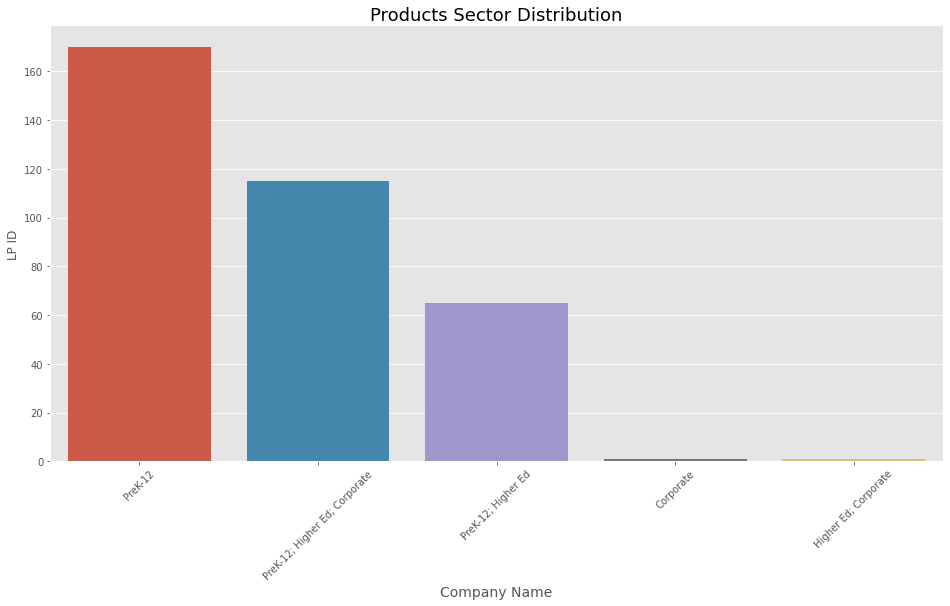

In [10]:
data = products_info.groupby('Sector(s)').count()[['LP ID']].reset_index().sort_values(by="LP ID", ascending=False)

plt.figure(figsize = (16,8))

sns.barplot(data=data, x="Sector(s)", y="LP ID")

plt.title('Products Sector Distribution',size=18)
plt.xlabel('Company Name',size=14)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
sns.despine()
plt.show()

#### Engagement Data

In [11]:
PATH = '../input/learnplatform-covid19-impact-on-digital-learning/engagement_data' 

temp = []

for district in districts_info.district_id.unique():
    df = pd.read_csv(f'{PATH}/{district}.csv', index_col=None, header=0)
    df["district_id"] = district
    temp.append(df)
    
    
engagement = pd.concat(temp)
engagement = engagement.reset_index(drop=True)

In [12]:
engagement

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-27,32213.0,100.00,3000.00,8815
1,2020-02-25,90153.0,33.33,2666.67,8815
2,2020-02-25,99916.0,0.00,NaN,8815
3,2020-02-25,28504.0,0.00,NaN,8815
4,2020-02-25,95731.0,33.33,333.33,8815
...,...,...,...,...,...
22324185,2020-12-31,43009.0,0.02,8.14,7164
22324186,2020-12-31,62984.0,0.00,0.04,7164
22324187,2020-12-31,90014.0,0.00,0.04,7164
22324188,2020-12-31,61945.0,0.29,16.06,7164


In [13]:
districts_info.isnull().sum()

district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
pct_free/reduced             85
county_connections_ratio     71
pp_total_raw                115
dtype: int64

In [14]:
products_info.isnull().sum()

LP ID                          0
URL                            0
Product Name                   0
Provider/Company Name          1
Sector(s)                     20
Primary Essential Function    20
dtype: int64

In [15]:
engagement.isnull().sum()

time                      0
lp_id                   541
pct_access            13447
engagement_index    5378409
district_id               0
dtype: int64

In [16]:
engagement.engagement_index=engagement.engagement_index.fillna(0)
products_info=products_info.rename(columns = {'LP ID': 'lp_id'}, inplace = False)

In [17]:
df1=engagement.join(districts_info.set_index('district_id'),on='district_id')
df2=df1.join(products_info.set_index('lp_id'),on='lp_id')
df2=df2.dropna(subset=['Product Name'])
df2.shape

(11691587, 16)

In [18]:
df1.head()

,time,lp_id,pct_access,engagement_index,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,2020-01-27,32213.0,100.00,3000.00,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2020-02-25,90153.0,33.33,2666.67,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
2,2020-02-25,99916.0,0.00,0.00,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
3,2020-02-25,28504.0,0.00,0.00,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
4,2020-02-25,95731.0,33.33,333.33,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["


In [19]:
df2.head()

,time,lp_id,pct_access,engagement_index,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,2020-01-27,32213.0,100.00,3000.00,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",https://classroom.google.com,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
1,2020-02-25,90153.0,33.33,2666.67,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",https://www.netflix.com/,Netflix,Netflix,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference - Streaming ..."
2,2020-02-25,99916.0,0.00,0.00,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",https://drive.google.com/start,Google Drive,Google LLC,PreK-12; Higher Ed; Corporate,LC/CM/SDO - Other
3,2020-02-25,28504.0,0.00,0.00,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",http://google.com/sheets/about/,Google Sheets,Google LLC,PreK-12; Higher Ed; Corporate,LC/CM/SDO - Other
4,2020-02-25,95731.0,33.33,333.33,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",http://docs.google.com/,Google Docs,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11691587 entries, 0 to 22324189
Data columns (total 16 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   time                        object 
 1   lp_id                       float64
 2   pct_access                  float64
 3   engagement_index            float64
 4   district_id                 int64  
 5   state                       object 
 6   locale                      object 
 7   pct_black/hispanic          object 
 8   pct_free/reduced            object 
 9   county_connections_ratio    object 
 10  pp_total_raw                object 
 11  URL                         object 
 12  Product Name                object 
 13  Provider/Company Name       object 
 14  Sector(s)                   object 
 15  Primary Essential Function  object 
dtypes: float64(3), int64(1), object(12)
memory usage: 1.5+ GB


In [21]:
df2.isnull().sum()

time                                0
lp_id                               0
pct_access                      10720
engagement_index                    0
district_id                         0
state                         2551886
locale                        2551886
pct_black/hispanic            2551886
pct_free/reduced              3939319
county_connections_ratio      3307488
pp_total_raw                  5452641
URL                                 0
Product Name                        0
Provider/Company Name               0
Sector(s)                      503804
Primary Essential Function     503804
dtype: int64

In [22]:
df2['time'] = pd.to_datetime(df2['time'], errors='coerce')
df2['month'] = df2['time'].dt.month

In [23]:
engagement_per_month=df2.groupby(['month'], as_index=False)['engagement_index'].mean()
engagement_per_month=engagement_per_month.sort_values(by=['month'],ascending=True)

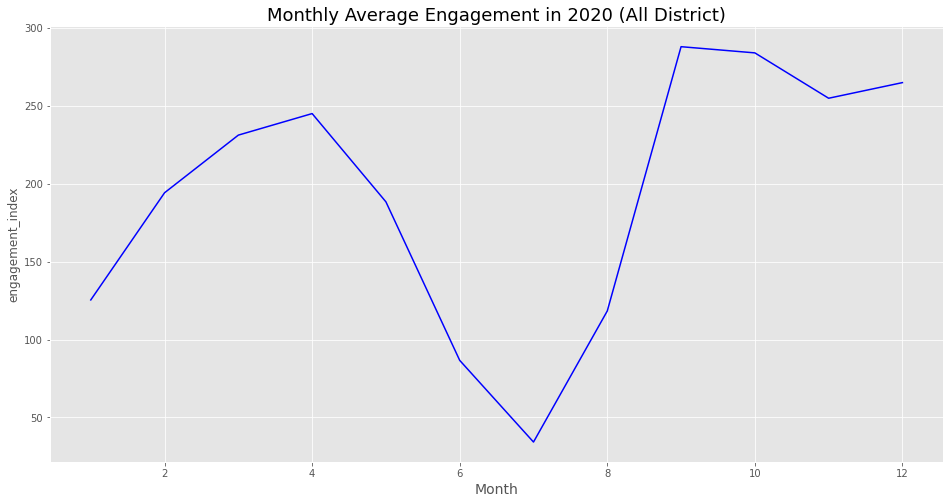

In [24]:
plt.figure(figsize = (16,8))

sns.lineplot(data=engagement_per_month, x="month", y= "engagement_index", color='b')
plt.title('Monthly Average Engagement in 2020 (All District)', size=18)
plt.xlabel('Month',size=14)

sns.despine()
plt.show()

In [25]:
#get the product name data base on average engagement index and sort it
top_product=df2.groupby(['Product Name', 'Primary Essential Function'], as_index=False)['engagement_index'].mean()
top_product=top_product.sort_values(by=['engagement_index'],ascending=False)

In [26]:
top_product

,Product Name,Primary Essential Function,engagement_index
116,Google Docs,LC - Content Creation & Curation,9833.445131
114,Google Classroom,SDO - Learning Management Systems (LMS),5166.622061
330,YouTube,"LC - Sites, Resources & Reference - Streaming ...",3221.426710
38,Canvas,LC - Online Course Providers & Technical Skill...,2313.604214
182,Meet,CM - Virtual Classroom - Video Conferencing & ...,1737.514975
...,...,...,...
156,Lakeshore,"LC - Sites, Resources & References - Learning ...",0.245358
6,ASCD Professional Development Tools,CM - Teacher Resources - Professional Learning,0.234027
248,School Specialty,"LC - Sites, Resources & References - Learning ...",0.153647
57,Cult of Pedagogy,CM - Teacher Resources - Professional Learning,0.112618


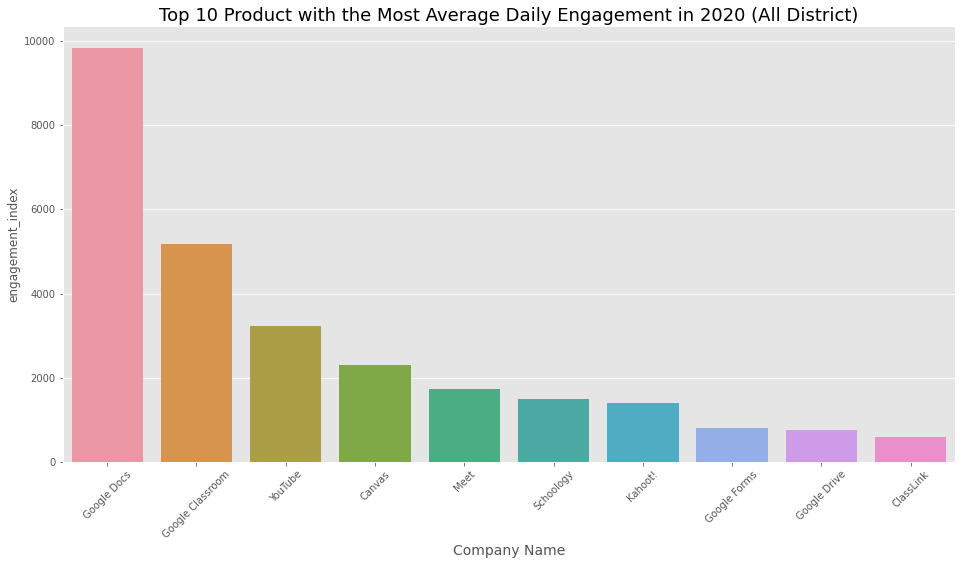

In [27]:
plt.figure(figsize = (16,8))

sns.barplot(data=top_product.head(10), x="Product Name", y= "engagement_index")

plt.title('Top 10 Product with the Most Average Daily Engagement in 2020 (All District)',size=18)
plt.xlabel('Company Name',size=14)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
sns.despine()
plt.show()

In [28]:
#get the category data base on average engagement index and sort it
top_category_platform=df2.groupby(['Primary Essential Function'], as_index=False)['engagement_index'].mean()
top_category_platform=top_category_platform.sort_values(by=['engagement_index'],ascending=False)

In [29]:
top_category_platform.head()

,Primary Essential Function,engagement_index
31,SDO - Learning Management Systems (LMS),2409.150029
11,LC - Online Course Providers & Technical Skill...,937.276087
8,LC - Content Creation & Curation,717.338410
6,CM - Virtual Classroom - Video Conferencing & ...,506.105978
34,SDO - School Management Software - SSO,468.008911


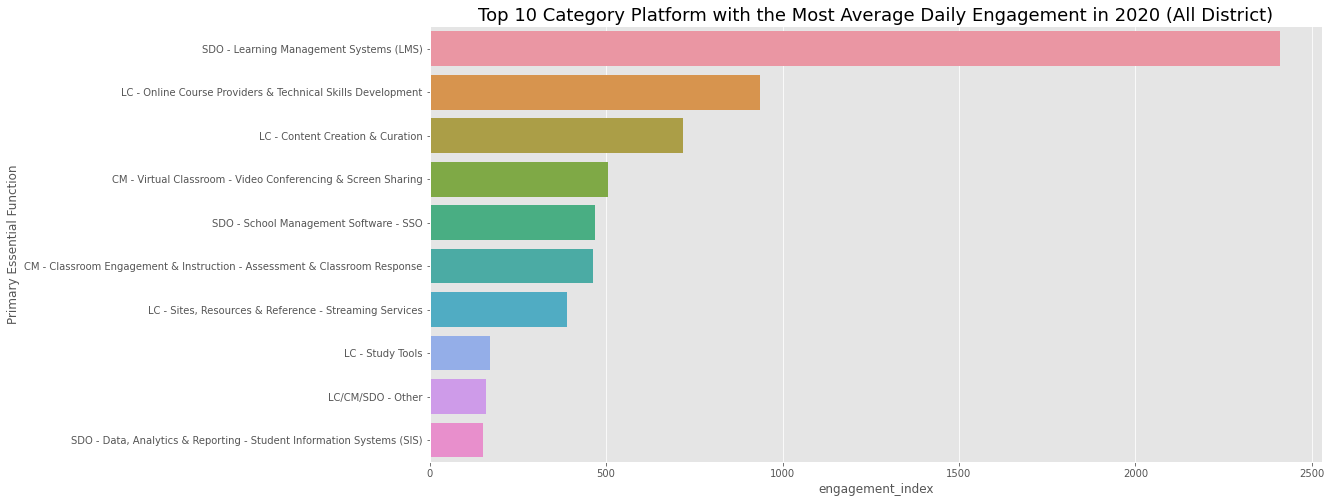

In [30]:
plt.figure(figsize = (16,8))

sns.barplot(data=top_category_platform[:10], y="Primary Essential Function", x= "engagement_index")
plt.title('Top 10 Category Platform with the Most Average Daily Engagement in 2020 (All District)', size=18)
sns.despine()
plt.show()

In [31]:
#get the lms data base on average engagement index
lms_engage = df2[df2['Primary Essential Function']=='SDO - Learning Management Systems (LMS)']
lms_engage=lms_engage.groupby(['month'], as_index=False)['engagement_index'].mean()
lms_engage=lms_engage.sort_values(by=['month'],ascending=True)

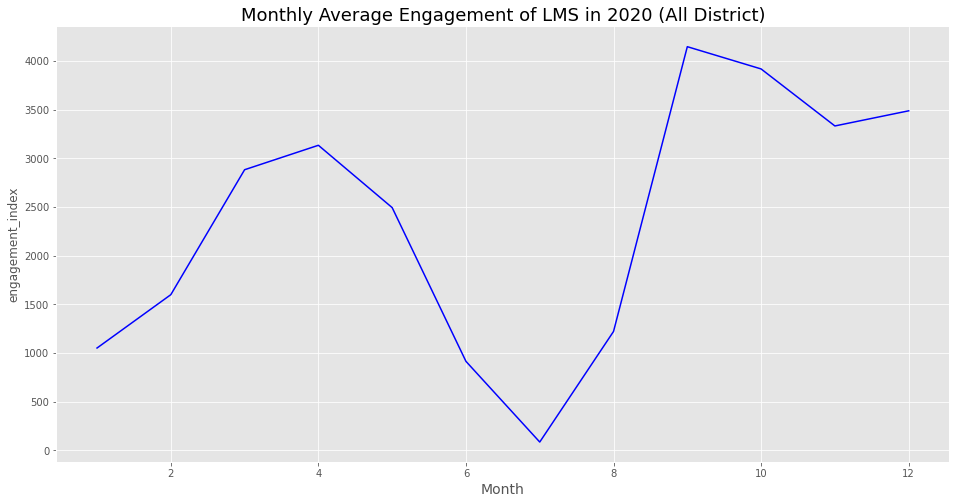

In [32]:
plt.figure(figsize = (16,8))

sns.lineplot(data=lms_engage, x="month", y= "engagement_index", color='b')
plt.title('Monthly Average Engagement of LMS in 2020 (All District)', size=18)
plt.xlabel('Month',size=14)

sns.despine()
plt.show()

In [33]:
#get the state data base on average engagement index
state_most_visit_lms = df2[df2['Primary Essential Function']=='SDO - Learning Management Systems (LMS)']
state_most_visit_lms = state_most_visit_lms.groupby(['state'], as_index=False)['engagement_index'].mean()
state_most_visit_lms = state_most_visit_lms.sort_values(by=['engagement_index'],ascending=False)

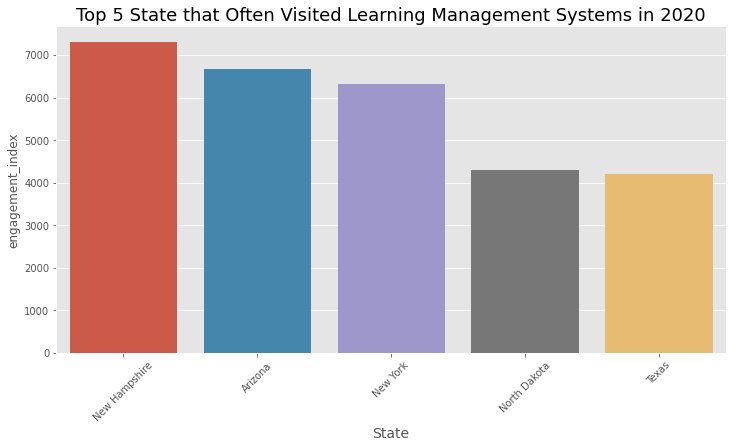

In [34]:
plt.figure(figsize = (12,6))

sns.barplot(data=state_most_visit_lms.head(5), x="state", y= "engagement_index")

plt.title('Top 5 State that Often Visited Learning Management Systems in 2020',size=18)
plt.xlabel('State',size=14)

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
sns.despine()
plt.show()

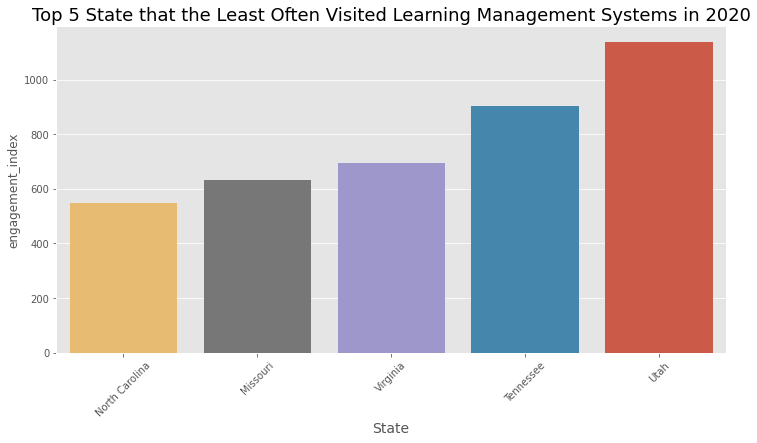

In [35]:
plt.figure(figsize = (12,6))

sns.barplot(data=state_most_visit_lms.tail(5), x="state", y= "engagement_index")

plt.title('Top 5 State that the Least Often Visited Learning Management Systems in 2020',size=18)
plt.xlabel('State',size=14)

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
sns.despine()
plt.gca().invert_xaxis()
plt.show()